# ASSIGNMENT - 7 - MACHINE LEARNING LAB
### NAME - PULKIT JASTI
### ROLL NUMBER - AP19110010491
### CSE - C

Implement the following clustering algorithm for the Iris dataset 
1. K-Means
2. hierarchical clustering.

### K-Means Clustering

c:\Users\prath\anaconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


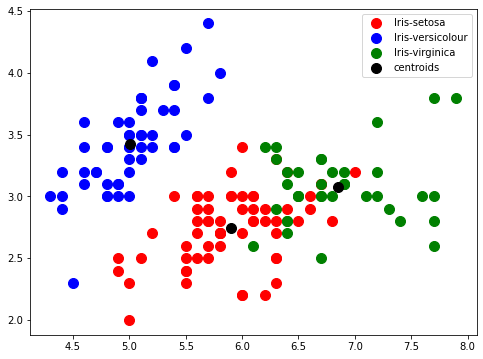

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets,metrics,cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
#Loading the dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
#Implementing K-Means Clustering
Centroid_list = []
No_of_clusters = range(1,11)
for i in No_of_clusters:
    kmeans = cluster.KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data.values)
    Centroid_list.append(kmeans.inertia_)
kmeans = cluster.KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
centroid = kmeans.fit_predict(data.values)
#Plotting the data values
plt.figure(figsize=(8,6))
plt.scatter(data.values[centroid==0,0],data.values[centroid==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(data.values[centroid==1,0],data.values[centroid==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(data.values[centroid==2,0],data.values[centroid==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')
plt.legend()

### Hierarchical Clustering

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

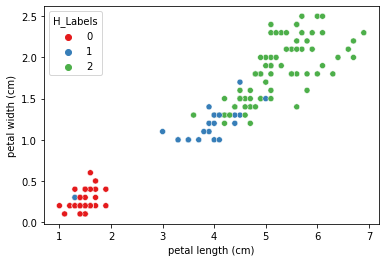

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets,metrics,cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
#Loading the dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
#Data preprocessing
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df_unsuper = iris_df.drop('species',axis=1)
#Standardizing the scaler
scaler =StandardScaler()
df1 =  scaler.fit_transform(iris_df_unsuper)
df1 = pd.DataFrame(df1,columns=iris_df_unsuper.columns[0:])
#Applying Hierarchical Clustering 
mergings = linkage(df1,method='complete',metric='euclidean')
cluster_labels_H=cut_tree(mergings,n_clusters=3).reshape(-1,)
iris_df['H_Labels'] = cluster_labels_H
#Plotting
sns.scatterplot(data=iris_df,x='petal length (cm)',y='petal width (cm)',hue='H_Labels',palette='Set1')